In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
x = np.array([[1, 2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
             [9, 11]])

#plt.scatter(x[:,0],x[:,1], s=150)
#plt.show()

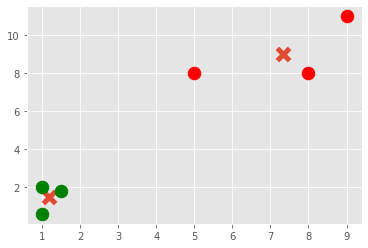

In [7]:
clf = KMeans(n_clusters=2)
clf.fit(x)

centroids = clf.cluster_centers_
labels = clf.labels_

colors=["g.","r.","c.","b.","k.","o."]

for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 25)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5)
#plt.show()

In [8]:
df = pd.read_excel('titanic.xls')
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [9]:
df.drop(['body','name'], 1, inplace=True)
df._convert(numeric=True)
df.fillna(0, inplace=True)

/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_39131/3093250387.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['body','name'], 1, inplace=True)


In [10]:
print(df.head())

   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S    0  Montreal, PQ / Chesterville, ON  
3        S    0  Montreal, PQ / Chesterville, ON  
4        S    0  Montreal, PQ / Chesterville, ON  


In [15]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x +=1
            
            df[column] = list(map(convert_to_int, df[column]))
            
        
    return df

df = handle_non_numerical_data(df)
print(df.head())
df.drop([print(df.head())])

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    1  29.0000      0      0     762  211.3375    162   
1       1         1    0   0.9167      1      2     508  151.5500    183   
2       1         0    1   2.0000      1      2     508  151.5500    183   
3       1         0    0  30.0000      1      2     508  151.5500    183   
4       1         0    1  25.0000      1      2     508  151.5500    183   

   embarked  boat  home.dest  
0         2     1        268  
1         2    28         23  
2         2     0         23  
3         2     0         23  
4         2     0         23  
   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    1  29.0000      0      0     762  211.3375    162   
1       1         1    0   0.9167      1      2     508  151.5500    183   
2       1         0    1   2.0000      1      2     508  151.5500    183   
3       1         0    0  30.0000      1      2     5

KeyError: '[None] not found in axis'

In [8]:
#df.drop(['ticket'], 1, inplace=True)

x = np.array(df.drop(['survived'], 1).astype(float))
x = preprocessing.scale(x)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(x)

correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
    
print(correct/len(x))

/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_3018/1989119044.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['survived'], 1).astype(float))


ValueError: could not convert string to float: 'female'

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
import pandas as pd

In [52]:
x = np.array([[1, 2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
             [9, 11],
             [1,3],
                   [8,9],
                   [0,3],
                   [5,4],
                   [6,4]])

#plt.scatter(x[:,0],x[:,1], s=150)
#plt.show()

In [53]:
colors= 0 * ["g","r","c","b","k"]

In [62]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        
        self.centroids = {}
            
        for i in range(self.k):
            self.centroids[i] = data[i]
                
        for i in range(self.max_iter):
            self.classifications = {}
                    
            for i in range(self.k):
                self.classifications[i] = []
                    
            for featureset in x:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                    
            prev_centroids = dict(self.centroids)
                
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                
            if optimized:
                break
            
        
    def predict(self, data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [63]:
clf = K_Means()
clf.fit(x)
#x[i][0], x[i][1], colors[labels[i]], markersize = 25
#centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5

484.7222222222223
13.0
52.10727969348656


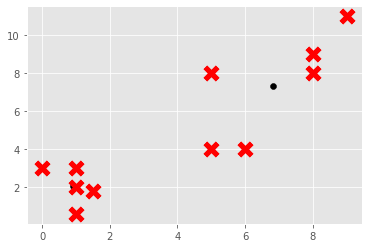

In [56]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="o", color="k")

    for classification in clf.classifications:
        #color = colors[classification]
        for featureset in clf.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="x", color="r", s=150, linewidths=5)
            
#plt.show()

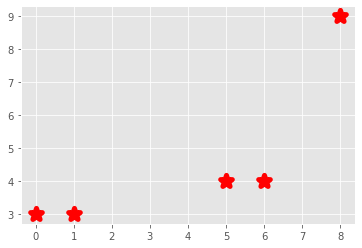

In [57]:
unknowns = np.array([[1,3],
                   [8,9],
                   [0,3],
                   [5,4],
                   [6,4]])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color="r", s=150, linewidths=5)
    

plt.show()

# Mean Shift Intro. p.39

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import MeanShift
import pandas as pd
style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

[[ 0.97705995  1.03116559  1.04675951]
 [ 4.99778036  5.03591024  5.04578005]
 [ 3.13544919  9.99300006 10.08643352]]
Number of estimated clusters: 3


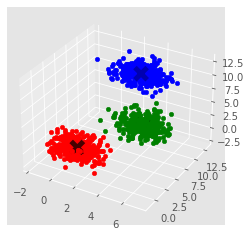

In [7]:
centers = [[1,1,1],[5,5,5],[3,10,10]]
x, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

ms = MeanShift()
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(x)):
    ax.scatter(x[i][0], x[i][1], x[i][2], c=colors[labels[i]], marker='o')
    
ax.scatter(cluster_centers[:, 0],cluster_centers[:,1],cluster_centers[:,2],
          marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import pandas as pd
style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

In [4]:
''' x = np.array([[1, 2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
             [9, 11]])

clf = KMeans(n_clusters=2)
clf.fit(x)

centroids = clf.cluster_centers_
labels = clf.labels_

colors=["g.","r.","c.","b.","k.","o."]

for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 25)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5)
'''

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)

df.drop(['body','name'], 1, inplace=True)
df._convert(numeric=True)

print(df.head())
df.fillna(0, inplace=True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x +=1
            
            df[column] = list(map(convert_to_int, df[column]))
            
        
    return df

df = handle_non_numerical_data(df)
#df.drop(['print(df.head())'])


#df.drop(['ticket'], 1, inplace=True)

x = np.array(df.drop(['survived'], 1).astype(float))
x = preprocessing.scale(x)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(x)

labels = clf.labels_
cluster_centrers = clf.cluster_centers_

original_df['cluster_group'] = np.nan

for i in range(len(x)):
    original_df['cluster_group'].iloc[i] = labels[i]

n_clusters_ = len(np.unique(labels))

survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    survival_cluster = temp_df[ (temp_df['survived']==1) ]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate
    
print(survival_rates)

/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_94564/1734291223.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['body','name'], 1, inplace=True)
/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_94564/1734291223.py:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['survived'], 1).astype(float))


   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S  NaN  Montreal, PQ / Chesterville, ON  
3        S  NaN  Montreal, PQ / Chesterville, ON  
4        S  NaN  Montreal, PQ / Chesterville, ON  


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


{0: 0.3791763791763792, 1: 0.9166666666666666, 2: 0.1}


In [5]:
print(original_df[ (original_df['cluster_group']==1) ])

     pclass  survived                                               name  \
17        1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
66        1         1                        Chaudanson, Miss. Victorine   
111       1         1                     Fortune, Miss. Alice Elizabeth   
112       1         1                         Fortune, Miss. Ethel Flora   
113       1         1                         Fortune, Miss. Mabel Helen   
115       1         0                                  Fortune, Mr. Mark   
116       1         1                Fortune, Mrs. Mark (Mary McDougald)   
183       1         1                             Lesurer, Mr. Gustave J   
253       1         1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
302       1         1                                   Ward, Miss. Anna   

        sex

In [6]:
print(original_df[ (original_df['cluster_group']==2) ])

      pclass  survived                                               name  \
629        3         0                        Andersson, Mr. Anders Johan   
632        3         0  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
644        3         0         Asplund, Mr. Carl Oscar Vilhelm Gustafsson   
646        3         1  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
831        3         0                     Goodwin, Mr. Charles Frederick   
832        3         0            Goodwin, Mrs. Frederick (Augusta Tyler)   
1106       3         0             Panula, Mrs. Juha (Maria Emilia Ojala)   
1146       3         0               Rice, Mrs. William (Margaret Norton)   
1179       3         0                              Sage, Mr. John George   
1180       3         0                     Sage, Mrs. John (Annie Bullen)   

         sex   age  sibsp  parch    ticket     fare cabin embarked boat  \
629     male  39.0      1      5    347082  31.2750   NaN        S  NaN   
63

In [7]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived          age        sibsp        parch  \
count  1287.000000  1287.000000  1026.000000  1287.000000  1287.000000   
mean      2.301476     0.379176    29.668291     0.491841     0.329448   
std       0.833320     0.485371    14.396055     1.041766     0.679810   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    38.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     4.000000   

              fare        body  cluster_group  
count  1286.000000  119.000000         1287.0  
mean     30.316378  159.571429            0.0  
std      40.945565   97.302914            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   71.000000            0.0  
50%      14.108300  155.000000            0.0

In [8]:
print(original_df[ (original_df['cluster_group']==1) ].describe())

       pclass   survived        age      sibsp      parch        fare  body  \
count    12.0  12.000000  12.000000  12.000000  12.000000   12.000000   0.0   
mean      1.0   0.916667  41.416667   1.000000   1.666667  344.715633   NaN   
std       0.0   0.288675  14.177180   1.279204   1.435481  123.866222   NaN   
min       1.0   0.000000  23.000000   0.000000   0.000000  247.520800   NaN   
25%       1.0   1.000000  33.250000   0.000000   0.750000  262.843750   NaN   
50%       1.0   1.000000  36.000000   0.500000   1.500000  263.000000   NaN   
75%       1.0   1.000000  52.000000   1.500000   2.250000  512.329200   NaN   
max       1.0   1.000000  64.000000   3.000000   4.000000  512.329200   NaN   

       cluster_group  
count           12.0  
mean             1.0  
std              0.0  
min              1.0  
25%              1.0  
50%              1.0  
75%              1.0  
max              1.0  


In [9]:
cluster_0 = print(original_df[ (original_df['cluster_group']==0) ])
cluster_0_fc = cluster_0[ (cluster_0['pclass']==1)]
cluster_0_fc.describe()

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

TypeError: 'NoneType' object is not subscriptable